# 1) Datu ielāde

In [13]:
import pandas as pd
from lvclassify_helpers import getdata10cat
	
data_news = getdata10cat()
data_news.head()

,category,body
0,Sports,Reaģējot uz Latvijas Paralimpiskās komitejas ...
1,Sports,Latvijas tenisiste Jeļena Ostapenko šodien Ķ...
2,Sports,Latvijas Sporta federāciju padome (LSFP) iebi...
3,Sports,Jaunais sporta finansējuma modelis samazinās f...
4,Sports,Aleksandrs un Mihails Samoilovi piektdien S...


# 2) Datu priekšapstrāde

## Izveidojam funkciju datu attīrīšanai - atdalošie simboli, lielie burti, palīgvārdi.

In [14]:
from lvclassify_helpers import getlvstopwords
import string
punct = string.punctuation
stopwords_arr = getlvstopwords()
print(stopwords_arr)

['aiz', 'ap', 'apakš', 'apakšpus', 'ar', 'arī', 'augšpus', 'bet', 'bez', 'bija', 'biji', 'biju', 'bijām', 'bijāt', 'būs', 'būsi', 'būsiet', 'būsim', 'būt', 'būšu', 'caur', 'diemžēl', 'diezin', 'droši', 'dēļ', 'esam', 'esat', 'esi', 'esmu', 'gan', 'gar', 'iekam', 'iekams', 'iekām', 'iekāms', 'iekš', 'iekšpus', 'ik', 'ir', 'it', 'itin', 'iz', 'ja', 'jau', 'jeb', 'jebšu', 'jel', 'jo', 'jā', 'ka', 'kamēr', 'kaut', 'kolīdz', 'kopš', 'kā', 'kļuva', 'kļuvi', 'kļuvu', 'kļuvām', 'kļuvāt', 'kļūs', 'kļūsi', 'kļūsiet', 'kļūsim', 'kļūst', 'kļūstam', 'kļūstat', 'kļūsti', 'kļūstu', 'kļūt', 'kļūšu', 'labad', 'lai', 'lejpus', 'līdz', 'līdzko', 'ne', 'nebūt', 'nedz', 'nekā', 'nevis', 'nezin', 'no', 'nu', 'nē', 'otrpus', 'pa', 'par', 'pat', 'pie', 'pirms', 'pret', 'priekš', 'pār', 'pēc', 'starp', 'tad', 'tak', 'tapi', 'taps', 'tapsi', 'tapsiet', 'tapsim', 'tapt', 'tapāt', 'tapšu', 'taču', 'te', 'tiec', 'tiek', 'tiekam', 'tiekat', 'tieku', 'tik', 'tika', 'tikai', 'tiki', 'tikko', 'tiklab', 'tiklīdz', 'tik

In [15]:
import spacy
!python -m spacy download xx_ent_wiki_sm
nlp = spacy.load("xx_ent_wiki_sm")

def datu_prieksapstrade(raksts):
  doc = nlp(raksts)
  tokens = []
  for token in doc:
    temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_arr and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     --------------------------------------- 0.0/11.1 MB 435.7 kB/s eta 0:00:26
      --------------------------------------- 0.1/11.1 MB 1.2 MB/s eta 0:00:09
     - -------------------------------------- 0.4/11.1 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.2/11.1 MB 5.6 MB/s eta 0:00:02
     --------- ------------------------------ 2.6/11.1 MB 10.4 MB/s eta 0:00:01
     -------------- ------------------------- 4.0/11.1 MB 13.5 MB/s eta 0:00:01
     ------------------- -------------------- 5.5/11.1 MB 15.8 MB/s eta 0:00:01
     ------------------------- -------------- 7.1/11.1 MB 18.2 MB/s eta 0:00:01
     -------------------------------- ------- 9.1/11.1 MB 20.8 MB/s eta 0:00:01
     --------------------------------------  10.8/11.1 MB 34.4 MB/s eta 0:00:01
     --------------------------------------- 11.1/11.1 MB 2

In [16]:
datu_prieksapstrade("""Visvairāk atļauju (41) plānots anulēt uzņēmumam "Alfor", kam seko "Olympic Casino Latvia" ar 36 atļaujām.""")

['visvairāk',
 'atļauju',
 '41',
 'plānots',
 'anulēt',
 'uzņēmumam',
 'alfor',
 'kam',
 'seko',
 'olympic',
 'casino',
 'latvia',
 '36',
 'atļaujām']

In [17]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dažādi vektorizācijas varianti
tfidf = TfidfVectorizer(tokenizer=datu_prieksapstrade)
count_vec = CountVectorizer(tokenizer=datu_prieksapstrade) # Countvectorizer kā BOW
count_vec_ngram = CountVectorizer(tokenizer=datu_prieksapstrade, ngram_range=(1,2)) # BOW ar ngrammām, Bag of bigrams

# 3) Modeļu apmācība / novērtēšana

## Sadalam datus 80/20

In [18]:
from sklearn.model_selection import train_test_split
x = data_news['body']
y = data_news['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)
x_train.shape, x_test.shape
# 9600 apmācības dati un 2400 testa dati

((9600,), (2400,))

## Apmācības process, statistika, pārbaudes ar piemēriem

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from pathlib import Path
import pickle


def fitKlasifikatoram(vectorizer, classifier):
	clf = Pipeline([('vectorizer',vectorizer), ('classifier',classifier)])
	clf.fit(x_train, y_train)
	return clf

def metrikasIzvade(clf, title, test_vector):
	y_pred = clf.predict(test_vector)
	cm = confusion_matrix(y_test, y_pred)
	accuracy_4dig = round(accuracy_score(y_test, y_pred), 4)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot(xticks_rotation=90)
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=3))
	#Saglabājam cik veiksmīga bijusi klasifikācija, tabulu tālāk liksim iekš darba
	clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
	filenameCsv = title + '_'+ str(accuracy_4dig) + '.csv'
	filenamePickle= title + '_'+ str(accuracy_4dig) + '.sav'
	clsf_report.to_csv(Path(".") / 'metrics' / filenameCsv, index= True)
	#Saglabājam modeli
	with open(Path(".") / 'models' / filenamePickle, 'wb') as f:
		pickle.dump(clf, f)

def fitArMetrikasIzvadi(vectorizer, classifier, title):
	clf = fitKlasifikatoram(vectorizer, classifier)
	metrikasIzvade(clf, title, x_test)

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.987     0.983     0.985       240
         Auto      0.983     0.992     0.988       240
     Finanses      0.948     0.908     0.928       240
         Kino      0.983     0.983     0.983       240
Kriminālziņas      0.975     0.992     0.983       240
   Literatūra      0.987     0.979     0.983       240
       Mūzika      0.983     0.988     0.985       240
     Politika      0.971     0.975     0.973       240
       Sports      1.000     1.000     1.000       240
 Tehnoloģijas      0.927     0.946     0.936       240

     accuracy                          0.975      2400
    macro avg      0.975     0.975     0.975      2400
 weighted avg      0.975     0.975     0.975      2400



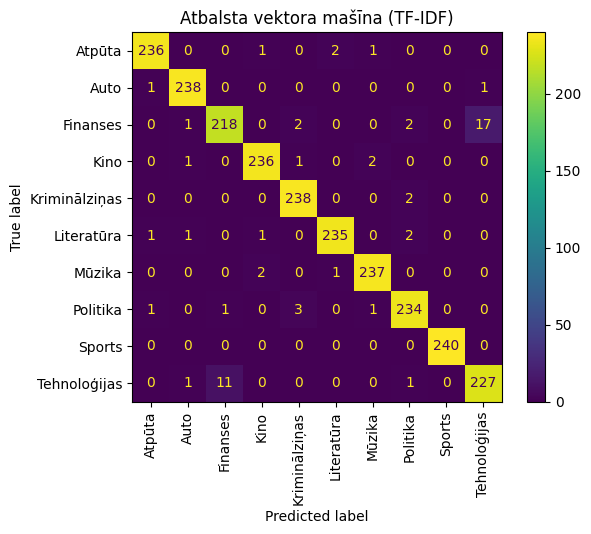

In [20]:
fitArMetrikasIzvadi(tfidf, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.937     0.983     0.959       240
         Auto      0.983     0.967     0.975       240
     Finanses      0.922     0.887     0.904       240
         Kino      0.967     0.992     0.979       240
Kriminālziņas      0.941     0.992     0.966       240
   Literatūra      0.991     0.958     0.975       240
       Mūzika      0.987     0.975     0.981       240
     Politika      0.912     0.946     0.928       240
       Sports      0.996     0.946     0.970       240
 Tehnoloģijas      0.915     0.900     0.908       240

     accuracy                          0.955      2400
    macro avg      0.955     0.955     0.955      2400
 weighted avg      0.955     0.955     0.955      2400



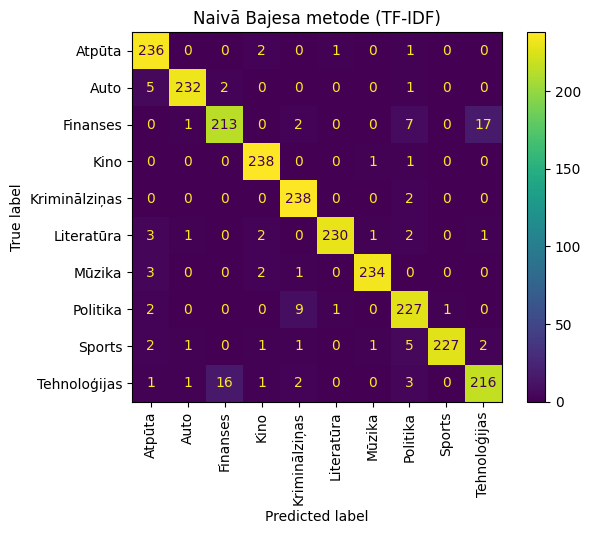

In [21]:
fitArMetrikasIzvadi(tfidf, MultinomialNB(), "Naivā Bajesa metode (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.975     0.975     0.975       240
         Auto      0.979     0.992     0.986       240
     Finanses      0.943     0.892     0.916       240
         Kino      0.983     0.979     0.981       240
Kriminālziņas      0.979     0.992     0.986       240
   Literatūra      0.983     0.971     0.977       240
       Mūzika      0.975     0.983     0.979       240
     Politika      0.962     0.946     0.954       240
       Sports      0.996     0.996     0.996       240
 Tehnoloģijas      0.897     0.946     0.921       240

     accuracy                          0.967      2400
    macro avg      0.967     0.967     0.967      2400
 weighted avg      0.967     0.967     0.967      2400



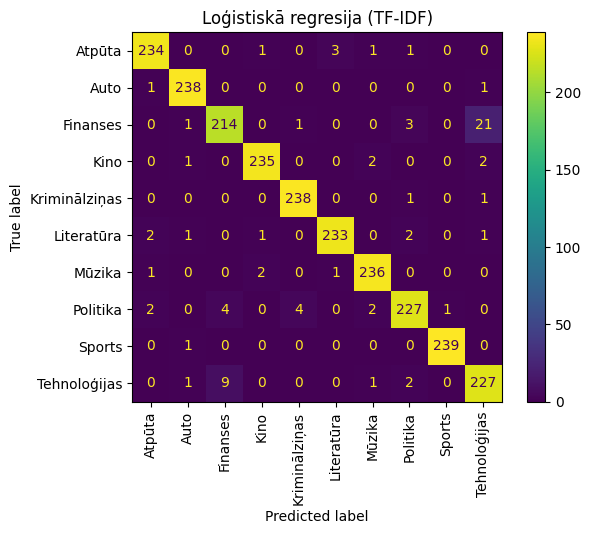

In [22]:
fitArMetrikasIzvadi(tfidf, LogisticRegression(), "Loģistiskā regresija (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.782     0.779     0.781       240
         Auto      0.805     0.858     0.831       240
     Finanses      0.751     0.779     0.765       240
         Kino      0.938     0.938     0.938       240
Kriminālziņas      0.803     0.867     0.834       240
   Literatūra      0.841     0.812     0.826       240
       Mūzika      0.876     0.850     0.863       240
     Politika      0.718     0.713     0.715       240
       Sports      0.836     0.808     0.822       240
 Tehnoloģijas      0.658     0.608     0.632       240

     accuracy                          0.801      2400
    macro avg      0.801     0.801     0.801      2400
 weighted avg      0.801     0.801     0.801      2400



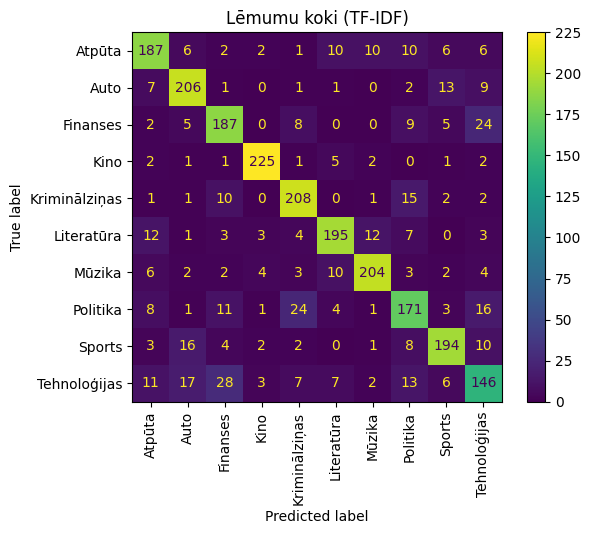

In [23]:
fitArMetrikasIzvadi(tfidf, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.987     0.971     0.979       240
         Auto      0.952     0.992     0.971       240
     Finanses      0.938     0.879     0.908       240
         Kino      0.987     0.979     0.983       240
Kriminālziņas      0.963     0.988     0.975       240
   Literatūra      0.963     0.971     0.967       240
       Mūzika      0.983     0.983     0.983       240
     Politika      0.962     0.938     0.949       240
       Sports      0.992     0.992     0.992       240
 Tehnoloģijas      0.892     0.925     0.908       240

     accuracy                          0.962      2400
    macro avg      0.962     0.962     0.962      2400
 weighted avg      0.962     0.962     0.962      2400



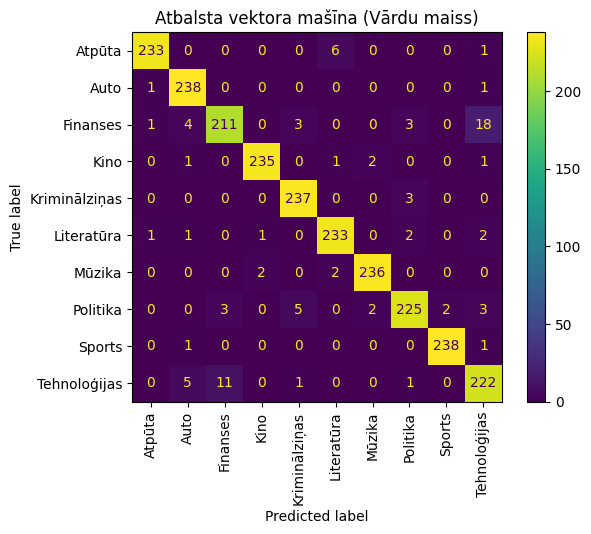

In [24]:
fitArMetrikasIzvadi(count_vec, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.983     0.967     0.975       240
         Auto      0.956     0.992     0.973       240
     Finanses      0.938     0.883     0.910       240
         Kino      0.983     0.983     0.983       240
Kriminālziņas      0.964     0.992     0.977       240
   Literatūra      0.967     0.971     0.969       240
       Mūzika      0.983     0.979     0.981       240
     Politika      0.970     0.942     0.956       240
       Sports      0.996     0.992     0.994       240
 Tehnoloģijas      0.892     0.929     0.910       240

     accuracy                          0.963      2400
    macro avg      0.963     0.963     0.963      2400
 weighted avg      0.963     0.963     0.963      2400



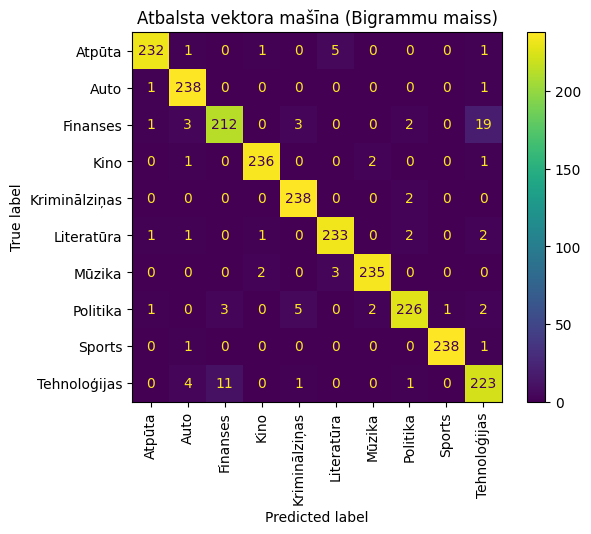

In [25]:
fitArMetrikasIzvadi(count_vec_ngram, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss)")

In [26]:
# # Sporta raksts
# fittedSVC = pickle.load(open("models/Atbalsta vektora mašīna (TF-IDF)_0.9646.sav", 'rb'))
# fittedSVC.predict(["""Latvijas basketbola izlase otrdien Džakartā ar smagu zaudējumu piedzīvoja pirmo zaudējumu Pasaules kausa vēsturē, H grupas pēdējās kārtas spēlē ar 75:101 (23:13, 19:30, 15:24, 18:34) piekāpjoties teicami otro puslaiku aizvadījušajai Kanādai.

# Latvija uzvarēja pirmo ceturtdaļu ar 10 punktu pārsvaru, bet atlikušajās 30 minūtēs piekāpās ar 52:88. Pēc pirmā puslaika Latvijai bija viena punkta deficīts, bet otro puslaiku Latvija zaudēja ar 33:58."""])

In [27]:
# # Politikas raksts
# fittedSVC.predict(["""Lēmumi par kontrolpunktu slēgšanu uz Lietuvas robežas ar Baltkrieviju tiks pieņemti, ja tiks konstatēts apdraudējums, kas atbildīs kritērijiem, ko noteiks starpinstitūciju darba grupa, otrdien paziņoja Lietuvas iekšlietu viceministrs Vitālijs Dmitrijevs.

# "Vienojāmies, ka, lai turpinātu slēgt robežkontroles punktus vai ierobežotu to darbību, nosakot noteiktas stundas, lai kontrolpunkts, piemēram, strādātu līdz pulksten 20 vai pulksten 18, acīmredzot ir nepieciešams visu kopīgs viedoklis," pēc vairāku ministriju, robežsardzes un citu dienestu pārstāvju tikšanās aģentūrai BNS sacīja Dmitrijevs."""])

# Word 2 Vec vektorizācija priekšapstrādē

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta      0.943     0.967     0.955       240
         Auto      0.936     0.908     0.922       240
     Finanses      0.907     0.854     0.880       240
         Kino      0.975     0.988     0.981       240
Kriminālziņas      0.935     0.958     0.947       240
   Literatūra      0.979     0.967     0.973       240
       Mūzika      0.951     0.971     0.961       240
     Politika      0.906     0.887     0.897       240
       Sports      0.938     0.938     0.938       240
 Tehnoloģijas      0.851     0.883     0.867       240

     accuracy                          0.932      2400
    macro avg      0.932     0.932     0.932      2400
 weighted avg      0.932     0.932     0.932      2400



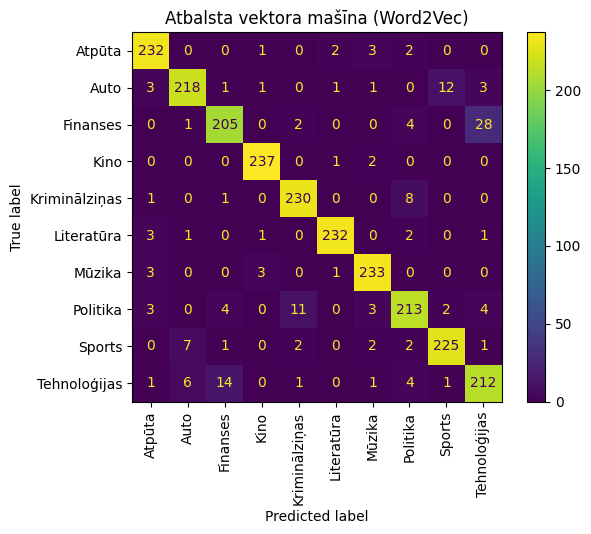

In [28]:
from gensim.models import Word2Vec
import numpy as np

x_train_w2v= x_train.apply(datu_prieksapstrade)
x_test_w2v= x_test.apply(datu_prieksapstrade)

w2v_model = Word2Vec(x_train_w2v, vector_size=200, window=5, min_count=5, workers=4)
def vectorize(teksts):
    vardu_vekt = [w2v_model.wv[vards] for vards in teksts if vards in w2v_model.wv]
    if len(vardu_vekt) == 0:
        return np.zeros(100)
    vardu_vekt = np.array(vardu_vekt)
    return vardu_vekt.mean(axis=0)


x_train_w2v = np.array([vectorize(teksts) for teksts in x_train_w2v])
x_test_w2v = np.array([vectorize(teksts) for teksts in x_test_w2v])

clfNew = LinearSVC()
clfNew.fit(x_train_w2v, y_train)
        
metrikasIzvade(clfNew, "Atbalsta vektora mašīna (Word2Vec)", x_test_w2v)